In [1]:
pip install pyagrum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.3 MB/s eta 0:00:00


In [2]:
from pyAgrum.pyAgrum import BNLearner
import pyAgrum as pg
bn = pg.BayesNet()
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}


In [3]:
a=bn.add(pg.LabelizedVariable('A','edad',3))
b=bn.add(pg.LabelizedVariable('B','nivel_ingresos',2))
c=bn.add(pg.LabelizedVariable('C','nivel_vida',2))
d=bn.add(pg.LabelizedVariable('D','salud',2))





In [4]:
import pyAgrum.lib.notebook as gnb
bn
#bn = pg.fastBN("a->b->c;a->d")
bn.addArc(a,b)
bn.addArc(b,c)
bn.addArc(a,d)
bn.addArc(a,c)

bn

(pyAgrum.BayesNet<double>@0x55d49765e0e0) BN{nodes: 4, arcs: 4, domainSize: 24, dim: 14, mem: 216o}

In [68]:
bn.cpt(a).fillWith([0.300,0.500,0.200])

(pyAgrum.Potential<double>@0x55d497154df0) 
  A                          |
0        |1        |2        |
---------|---------|---------|
 0.3000  | 0.5000  | 0.2000  |

In [69]:
bn.cpt(c).names

('C', 'B', 'A')

In [164]:
bn.cpt(b)[{'A':0}]=[0.5,0.5]
bn.cpt(b)[{'A':1}]=[0.5,0.5]
bn.cpt(b)[{'A':2}]=[0.5,0.5]
bn.cpt(b)

(pyAgrum.Potential<double>@0x55d4971d3cc0) 
      ||  B                |
A     ||0        |1        |
------||---------|---------|
0     || 0.5000  | 0.5000  |
1     || 0.5000  | 0.5000  |
2     || 0.5000  | 0.5000  |

In [166]:
bn.cpt(c)[{'B':0,'A':0}]=[0.1,0.9]
bn.cpt(c)[{'B':0,'A':1}]=[0.3,0.7]
bn.cpt(c)[{'B':0,'A':2}]=[0.2,0.8]

bn.cpt(c)

(pyAgrum.Potential<double>@0x55d497109990) 
             ||  C                |
B     |A     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.1000  | 0.9000  |
1     |0     || 0.0000  | 1.0000  |
0     |1     || 0.3000  | 0.7000  |
1     |1     || 0.0000  | 1.0000  |
0     |2     || 0.2000  | 0.8000  |
1     |2     || 0.0000  | 1.0000  |

In [167]:
bn.cpt(d)[0,:]=[0.9,0.1]
bn.cpt(d)[1,:]=[0.7,0.3]
bn.cpt(d)[2,:]=[0.3,0.7]
bn.cpt(d)

(pyAgrum.Potential<double>@0x55d497242d80) 
      ||  D                |
A     ||0        |1        |
------||---------|---------|
0     || 0.9000  | 0.1000  |
1     || 0.7000  | 0.3000  |
2     || 0.3000  | 0.7000  |

In [168]:
ie=pg.LazyPropagation(bn)

In [169]:
ie.makeInference()

In [178]:
ie.posterior(c)

(pyAgrum.Potential<double>@0x55d498ad1550) 
  C                |
0        |1        |
---------|---------|
 0.1100  | 0.8900  |

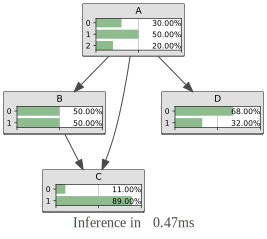

In [179]:
gnb.showInference(bn)

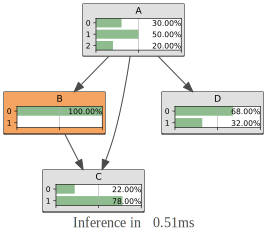

In [176]:
gnb.showInference(bn,evs={'B':0})

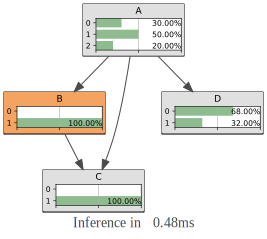

In [177]:
gnb.showInference(bn,evs={'B':1})

In [180]:
e=bn.add(pg.LabelizedVariable('E','peso',2))
f=bn.add(pg.LabelizedVariable('F','tension_arterial',2))
g=bn.add(pg.LabelizedVariable('G','riesgo_infarto',2))

bn.addArc(e,g)
bn.addArc(f,g)
bn.addArc(g,d)

bn



(pyAgrum.BayesNet<double>@0x55d49765e0e0) BN{nodes: 7, arcs: 7, domainSize: 192, dim: 23, mem: 360o}